### This notebook is simply used to make a graphic. And requires the ensembler package. 

To install ensembler (and other dependencies), follow instructions at: https://github.com/rinikerlab/Ensembler

In [1]:
import os, sys

import ensembler

#Imports:
import numpy as np
from matplotlib import pylab as plt
from matplotlib.pyplot import cm

#import Ensembler
from ensembler.potentials import OneD as pot

##Imports:
import ensembler.visualisation.plotPotentials as exPlot

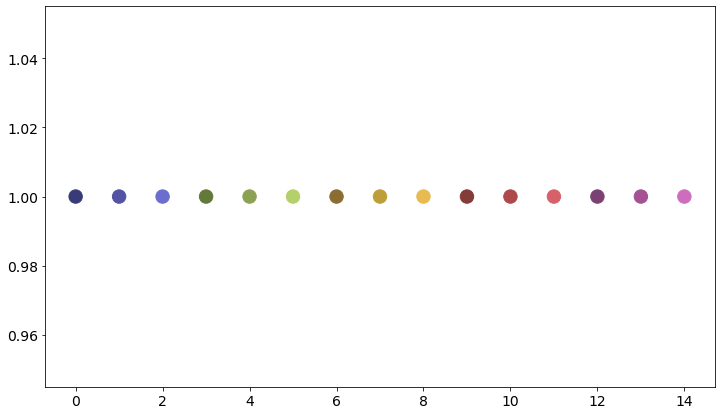

In [2]:
import matplotlib.pyplot as plt
import numpy as np

colors_tab20b =  plt.cm.tab20b( (4./3*np.arange(20*3/4)).astype(int) )
plt.scatter(np.arange(15),np.ones(15), c=colors_tab20b, s=180)

plt.show()

In [3]:
def fill_curve(ax, x, f_x, upper = 0.5):
    """
    Fills between curves
    """
    y = np.ones(len(f_x)) * min(f_x) + upper
    ax.fill_between(x, f_x, y, where=y > f_x, color = 'lightgrey', alpha = 0.5, interpolate = True)
    return None

In [4]:
def arrowed_spines(fig, ax):
    
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()
    
    xmin += 0.75
    ymin += 0.75
    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./30.*(ymax-ymin) 
    hl = 1./30.*(xmax-xmin)
    lw = 1.5 # axis line width
    ohg = 0.2 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


0
1
2
3
4


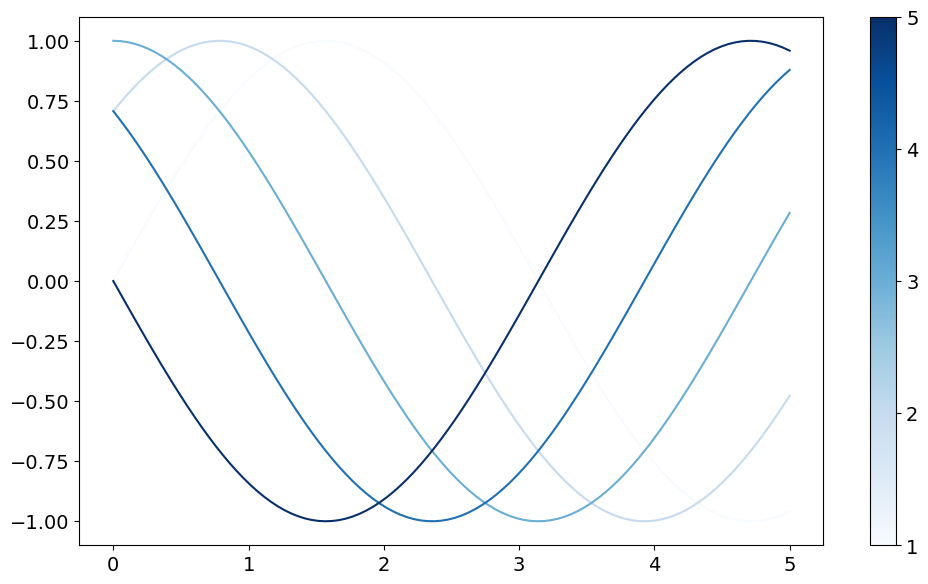

In [5]:
import matplotlib as mpl
n_lines = 5
x = np.linspace(0, 5, 100)
y = np.sin(x[:, None] + np.pi * np.linspace(0, 1, n_lines))
c = np.arange(1, n_lines + 1)

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])

fig, ax = plt.subplots(dpi=100)
for i, yi in enumerate(y.T):
    print (i)
    ax.plot(x, yi, c=cmap.to_rgba(i + 1))
fig.colorbar(cmap, ticks=c)
plt.show()


# Make a plot with 4 states

In [6]:
test_timing_with_points=1000
positions = np.linspace(-10, 12, test_timing_with_points)


V_offset_A = 0.75
V_offset_B = 0
V_offset_C = 4
V_offset_D = 4.75


r_0_A = 1
r_0_B = 2

r_0_C = 7
r_0_D = 8


k_A = 1.5
k_B = 2
k_C = 2
k_D = 1.5

V_A = pot.harmonicOscillatorPotential(x_shift=r_0_A, y_shift=V_offset_A, k=k_A)
V_B = pot.harmonicOscillatorPotential(x_shift=r_0_B, y_shift=V_offset_B, k=k_B)
V_C = pot.harmonicOscillatorPotential(x_shift=r_0_C, y_shift=V_offset_C, k=k_C)

V_D = pot.harmonicOscillatorPotential(x_shift=r_0_D, y_shift=V_offset_D, k=k_D)

eoffs = np.array([V_offset_A, V_offset_B, V_offset_C]) - min([V_offset_A, V_offset_B, V_offset_C])

V_R = pot.envelopedPotential(V_is=[V_A,V_B, V_C, V_D], s=1, eoff=[0, 0, 0, 0,])

V_R_twostate = pot.envelopedPotential(V_is=[V_B, V_C], s=1, eoff=[0, 0,])

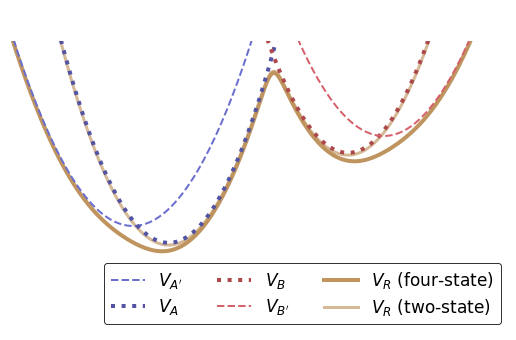

In [7]:
fig,ax = plt.subplots(ncols=1, figsize = [9, 6])

x = 9

lw = 2

ax.plot(positions, V_A.ene(positions), c=colors_tab20b[2], lw=lw, zorder=3, label="$V_{A^{\prime}}$", ls = '--')
ax.plot(positions, V_B.ene(positions), c=colors_tab20b[1], lw=2*lw, zorder=3, label="$V_{A}$", ls ='dotted')

ax.plot(positions, V_C.ene(positions), c=colors_tab20b[x+1], lw=2*lw, zorder=3, label="$V_{B}$", ls ='dotted')
ax.plot(positions, V_D.ene(positions), c=colors_tab20b[x+2], lw=lw, zorder=3, label="$V_{B^{\prime}}$", ls ='--')


for side in ['top', 'bottom', 'right', 'left']:
    ax.spines[side].set_visible(False)
ax.tick_params(left=False, labelleft=False, bottom =False, labelbottom =False)

padding = 3.5
ax.set_xlim([min([r_0_A, r_0_B, r_0_C, r_0_D]) - padding, max([r_0_A, r_0_B, r_0_C, r_0_D]) + 3.5 ])

ax.set_ylim([-2, 10.5])  # c596c5

brown = '#BF945F'
purple = colors_tab20b[12]

ax.plot(positions, V_R.ene(positions)-0.15, c=brown, lw=4, ls = '-', zorder=2, label="$V_R$ (four-state)", alpha = 1)
ax.plot(positions, V_R_twostate.ene(positions)-0.1, c=brown, lw=3, ls = '-', zorder=2, label="$V_R$ (two-state)", alpha = 0.65)


ax.set_ylim([-4, 10.5])
ax.legend(fancybox=True, edgecolor ='black', ncol =3, fontsize = 17, labelspacing = 0.35, loc='lower right')

import matplotlib.patches as patches

rect = patches.Rectangle((-10, 9), 100, 100, linewidth=2, edgecolor='white', facecolor='white', zorder=10)
ax.add_patch(rect)


In [8]:
# fig.savefig('/home/cchampion/Desktop/4_state_eds_potential_fig4_test_leg.png', dpi=300)